# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [67]:
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [68]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mouse_ids = dup_mice['Mouse ID'].unique()
dup_mouse_ids

array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data.drop_duplicates(subset='Mouse ID', keep='first')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [72]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

249

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_dev = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume	': median,
    'Tumor Volume Variance	': variance,
    'Tumor Volume Std. Dev.	': std_dev,
    'Tumor Volume Std. Err.': sem

})
summary_stats

,Mean Tumor Volume,Median Tumor Volume\t,Tumor Volume Variance\t,Tumor Volume Std. Dev.\t,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_data = clean_data.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['mean', 'median', 'var', 'std', 'sem']
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

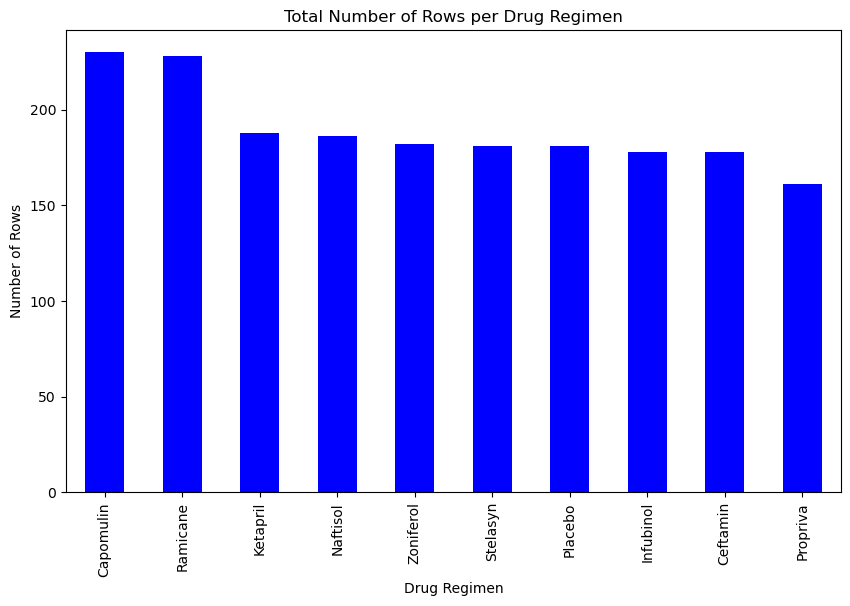

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = mouse_data['Drug Regimen'].value_counts().sort_values(ascending=False)

drug_counts.plot(kind='bar', color='blue', figsize=(10, 6))

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

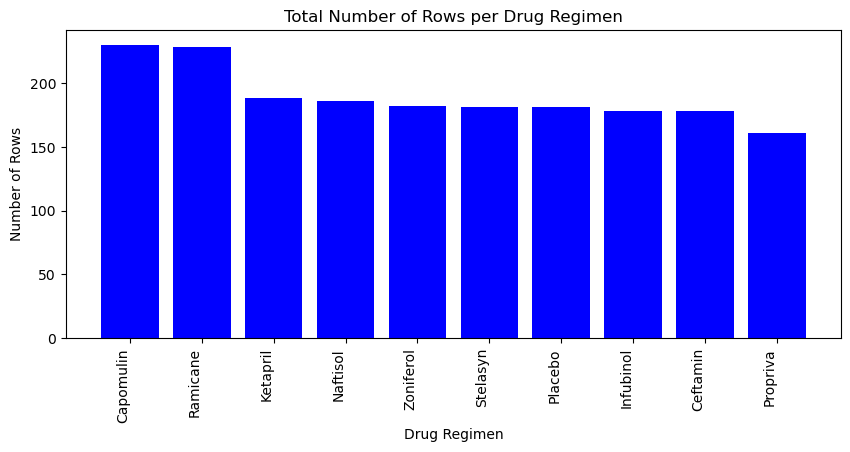

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = mouse_data['Drug Regimen'].value_counts().sort_values(ascending=False)

drug_names = drug_counts.index
counts = drug_counts.values

plt.figure(figsize=(10, 4))
plt.bar(drug_names, counts, color='blue')

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=90, ha='right')
plt.show()

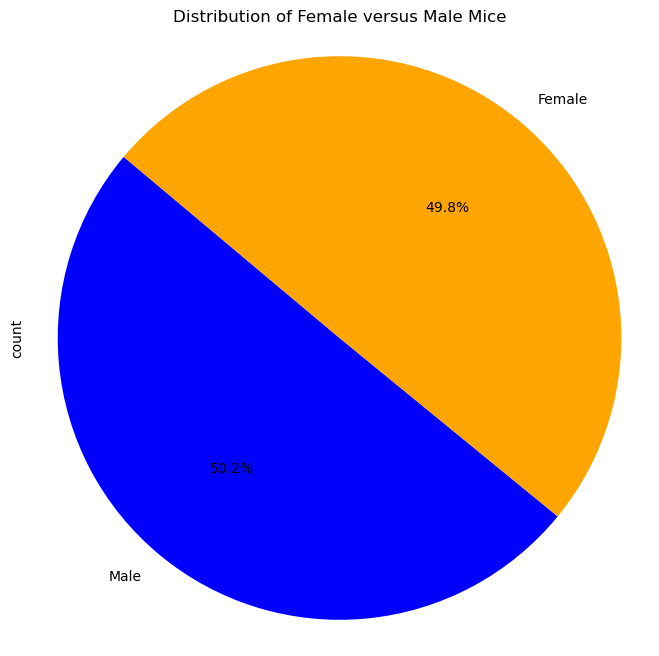

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist = clean_data['Sex'].value_counts()

sex_dist.plot(kind='pie', autopct='%2.1f%%', colors=['blue', 'orange'], startangle=140, figsize=(8, 8))

plt.title('Distribution of Female versus Male Mice')

plt.axis('equal')
plt.show()

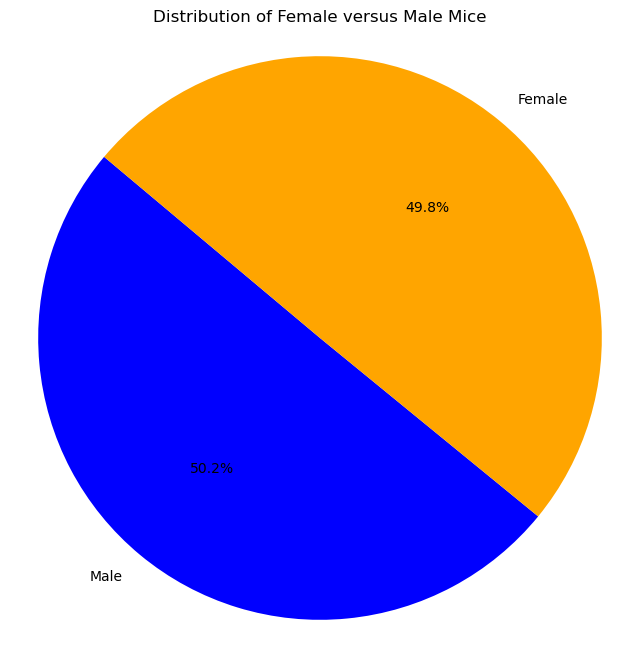

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist = clean_data['Sex'].value_counts()

labels = sex_dist.index
sizes = sex_dist.values

colors = ['blue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)


plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_tp = mouse_data.groupby('Mouse ID')['Timepoint'].max()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = pd.merge(last_tp, mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(target_regimens)]

In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    if len(outliers) == 0:
        print("No potential outliers found.")
    else:
        print(f"{treatment} potential outliers:")
        print(outliers)
    

No potential outliers found.
No potential outliers found.
Infubinol potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
No potential outliers found.


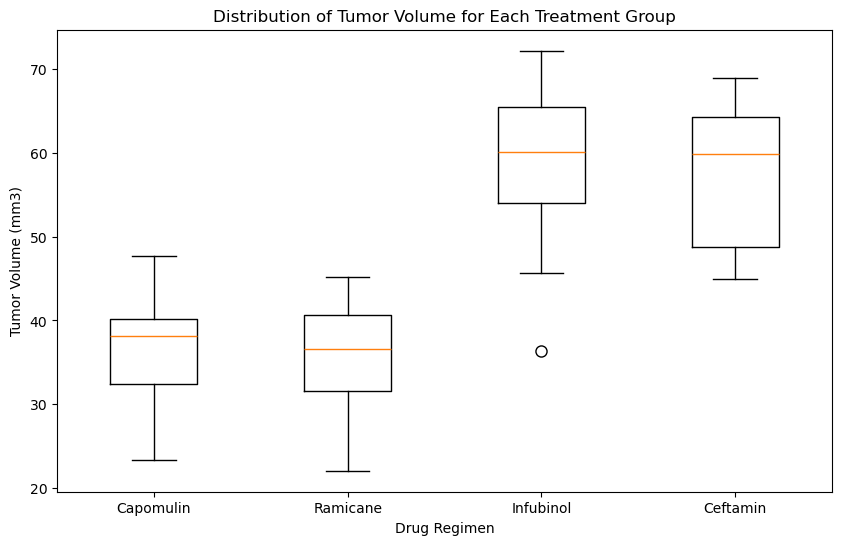

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

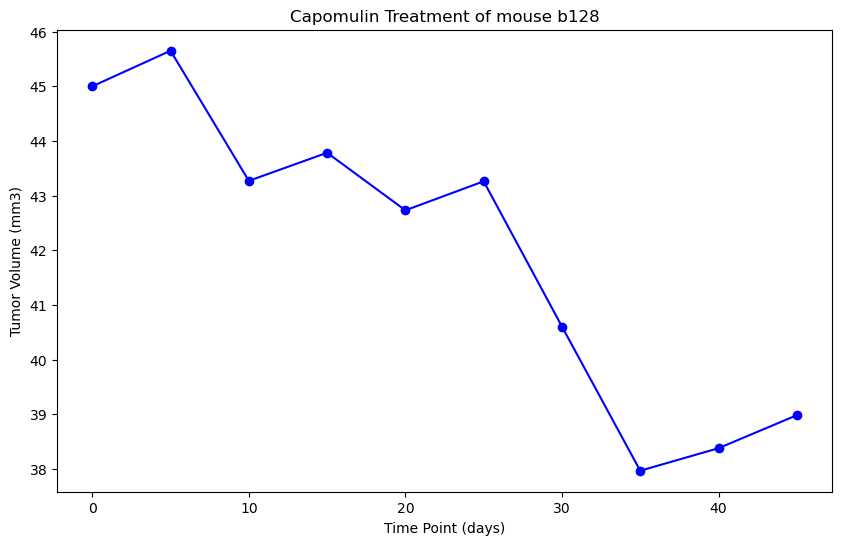

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id_capomulin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin', 'Mouse ID'].iloc[0]

mouse_data_capomulin = mouse_data.loc[(mouse_data['Drug Regimen'] == 'Capomulin') & (mouse_data['Mouse ID'] == mouse_id_capomulin)]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title(f'Capomulin Treatment of mouse {mouse_id_capomulin}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

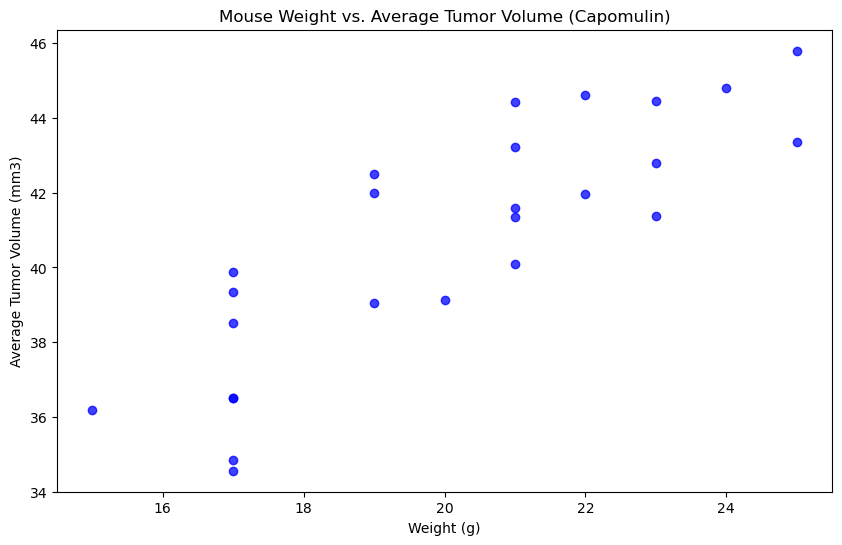

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

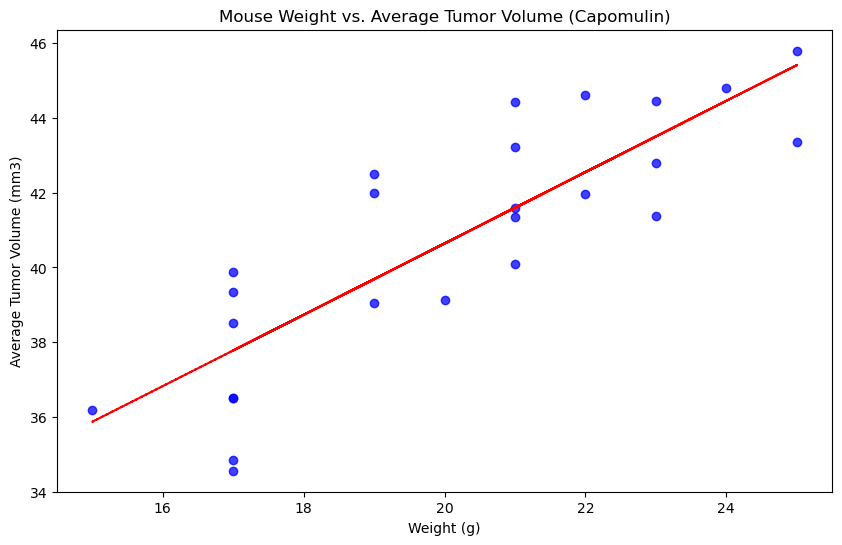

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
slope, intercept, rvalue, pvalue, stderr = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', linestyle='--')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()